In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xanes_derivatives import xanes_derivatives

This Notebook uses a dataframe of 10,000 averaged XANES spectra and attempts to predict the coordination from the spectra, first derivative of the spectra, second derivative of the spectra, and a combination using the sklearn multilayer perceptron regression neural network.

In [2]:
df = pd.read_csv('mu10000.csv')

In [3]:
df

,CN,Mu1,Mu2,Mu3,Mu4,Mu5,Mu6,Mu7,Mu8,Mu9,...,Mu91,Mu92,Mu93,Mu94,Mu95,Mu96,Mu97,Mu98,Mu99,Mu100
0,9.118123,0.031128,0.033685,0.036141,0.038614,0.041223,0.044086,0.047322,0.051048,0.055384,...,1.006451,1.006826,1.007279,1.007820,1.008459,1.009209,1.010079,1.011081,1.012226,1.013524
1,9.982105,0.030359,0.032863,0.035257,0.037652,0.040162,0.042900,0.045978,0.049510,0.053607,...,0.990334,0.992630,0.995239,0.998179,1.001467,1.005122,1.009162,1.013604,1.018468,1.023769
2,9.999510,0.030369,0.032855,0.035236,0.037623,0.040127,0.042859,0.045930,0.049452,0.053537,...,0.994056,0.996536,0.999312,1.002392,1.005782,1.009490,1.013522,1.017886,1.022590,1.027639
3,9.739154,0.030461,0.032974,0.035378,0.037786,0.040312,0.043069,0.046171,0.049731,0.053863,...,1.001889,1.002645,1.003574,1.004699,1.006045,1.007635,1.009494,1.011643,1.014109,1.016913
4,9.736296,0.030375,0.032841,0.035208,0.037585,0.040085,0.042817,0.045893,0.049424,0.053520,...,0.997625,0.998350,0.999261,1.000406,1.001833,1.003589,1.005722,1.008281,1.011312,1.014864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9.141965,0.030467,0.032891,0.035230,0.037590,0.040081,0.042811,0.045888,0.049421,0.053517,...,1.007059,1.006536,1.006068,1.005712,1.005527,1.005574,1.005910,1.006595,1.007687,1.009246
9996,9.721995,0.030587,0.033079,0.035471,0.037874,0.040401,0.043163,0.046274,0.049843,0.053985,...,0.994157,0.997098,1.000359,1.003936,1.007828,1.012035,1.016554,1.021383,1.026521,1.031967
9997,9.335612,0.031082,0.033661,0.036129,0.038608,0.041217,0.044078,0.047311,0.051039,0.055381,...,1.001893,1.000900,0.999983,0.999175,0.998510,0.998019,0.997736,0.997696,0.997929,0.998471
9998,9.087615,0.031005,0.033524,0.035947,0.038390,0.040969,0.043799,0.046996,0.050677,0.054956,...,0.999137,0.999958,1.000910,1.002006,1.003256,1.004673,1.006269,1.008056,1.010046,1.012250


## Fitting with Entire Spectra:

The first example provided is predicting the coordination number based on training the neural network on the entire spectra.

In [4]:
X = df.drop(labels='CN', axis=1)
y = df['CN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=519)

Starting with one hidden layer, the number of neurons in that layer is optimized by iterating from 1 to 100 (the number of features the neural network is trained on).

In [5]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf)

/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn'

           0
0   0.102808
1   0.101964
2   0.100643
3   0.098976
4   0.096626
5   0.038363
6   0.037848
7   0.056012
8   0.027756
9   0.029181
10  0.028629
11  0.061282
12  0.052805
13  0.035868
14  0.025576
15  0.059449
16  0.021188
17  0.020173
18  0.018517
19  0.057854
20  0.045094
21  0.061132
22  0.020473
23  0.037314
24  0.060276
25  0.021405
26  0.060754
27  0.049278
28  0.062648
29  0.053020
30  0.019313
31  0.019405
32  0.020684
33  0.045869
34  0.017153
35  0.058964
36  0.021039
37  0.050940
38  0.035229
39  0.060929
40  0.046748
41  0.061021
42  0.021200
43  0.022906
44  0.024061
45  0.051471
46  0.053826
47  0.036408
48  0.033485
49  0.016168
50  0.054819
51  0.019616
52  0.019182
53  0.015921
54  0.055468
55  0.018857
56  0.059148
57  0.061069
58  0.052477
59  0.029080
60  0.025956
61  0.018187
62  0.016761
63  0.055997
64  0.054369
65  0.026230
66  0.063484
67  0.063309
68  0.023058
69  0.056090
70  0.021666
71  0.020661
72  0.020078
73  0.061745
74  0.059625
75  0.018551

The most optimal layer is noted to have 54 neurons. I attempted to add a second layer and repeat this process, but the loss was not improved.

In [6]:
min_loss = lossdf.idxmin()[0]+1
print(min_loss)
nn = MLPRegressor(hidden_layer_sizes=(min_loss), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)


54
0.01592139919763091


Outputted below are the calculated mean squared error and R^2 value for the training and testing data when fitting with the averaged spectra. This is followed by a parity plot of the predicted y for testing data and the actual testing data for y.

In [7]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score = nn.score(X_train, y_train)
test_score = nn.score(X_test, y_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print('training mse =  '+ str(train_mse))
print('testing mse = ' + str(test_mse))
print('training R2 = ' + str(train_score))
print('testing R2 = ' + str(test_score))

training mse =  0.030029353692895625
testing mse = 0.029626558185347204
training R2 = 0.840655456059886
testing R2 = 0.8368539933332251


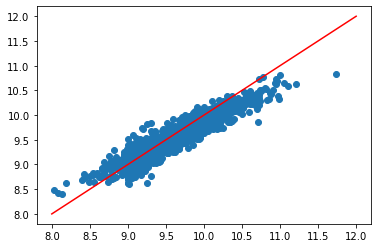

In [8]:
y_pred = nn.predict(X_test)
x = np.linspace(8, 12, 50)
plt.scatter(y_test, y_pred)
plt.plot(x,x, color='red')

***

## Fitting with 1st Derivative:

Next, the first and second derivative are calculated and used as data to fit a neural network.

In [9]:
d1, d2 = xanes_derivatives(df)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(d1, y)

The same process is repeated as before to obtain the optimum number of neurons in the single hidden layer.

In [11]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf1 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf1)

           0
0   0.019190
1   0.015061
2   0.014911
3   0.009111
4   0.012145
5   0.008089
6   0.008434
7   0.007367
8   0.007468
9   0.008449
10  0.008272
11  0.006972
12  0.007452
13  0.007165
14  0.006649
15  0.006656
16  0.006753
17  0.005886
18  0.007389
19  0.006462
20  0.005644
21  0.007023
22  0.006624
23  0.006828
24  0.005992
25  0.007369
26  0.007208
27  0.006005
28  0.005943
29  0.006062
30  0.005397
31  0.006221
32  0.005899
33  0.005933
34  0.005828
35  0.006351
36  0.006085
37  0.005467
38  0.005264
39  0.005450
40  0.005465
41  0.005367
42  0.004971
43  0.005601
44  0.005754
45  0.005493
46  0.005593
47  0.005739
48  0.005074
49  0.005387
50  0.005183
51  0.005825
52  0.005581
53  0.005735
54  0.005006
55  0.004804
56  0.006517
57  0.005364
58  0.005587
59  0.005387
60  0.005178
61  0.005061
62  0.004855
63  0.005340
64  0.005380
65  0.005305
66  0.005793
67  0.004976
68  0.005179
69  0.005268
70  0.005388
71  0.005317
72  0.005099
73  0.005142
74  0.005517
75  0.005266

As can be seen, using the first derivative instead of the entire spectra yielded a lower loss as well as improved mean squared errors and R^2 values.

In [12]:
min_loss1 = lossdf1.idxmin()[0]+1
print(min_loss1)
nn = MLPRegressor(hidden_layer_sizes=(min_loss1), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

93
0.004422686966873892


In [13]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score = nn.score(X_train, y_train)
test_score = nn.score(X_test, y_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print('training mse =  '+ str(train_mse))
print('testing mse = ' + str(test_mse))
print('training R2 = ' + str(train_score))
print('testing R2 = ' + str(test_score))

training mse =  0.007752372152248402
testing mse = 0.008011402852407961
training R2 = 0.9585099240789786
testing R2 = 0.957350167152212


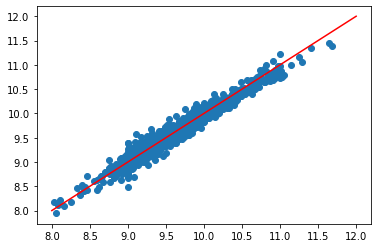

In [14]:
y_pred = nn.predict(X_test)
x = np.linspace(8, 12, 50)
plt.scatter(y_test, y_pred)
plt.plot(x,x, color='red')

This entire process was repeated a second time using the optimized first layer and adding a second layer.

In [15]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss1, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf2 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf2)

           0
0   0.006181
1   0.004847
2   0.004390
3   0.004622
4   0.004787
5   0.004728
6   0.004229
7   0.003491
8   0.003886
9   0.004114
10  0.003857
11  0.004039
12  0.003374
13  0.004079
14  0.003889
15  0.003846
16  0.003512
17  0.004455
18  0.004163
19  0.004427
20  0.003705
21  0.003415
22  0.004025
23  0.003351
24  0.003915
25  0.003255
26  0.003754
27  0.003436
28  0.003558
29  0.004329
30  0.003876
31  0.003971
32  0.004274
33  0.003918
34  0.003833
35  0.003474
36  0.003850
37  0.003308
38  0.003788
39  0.003122
40  0.003644
41  0.004101
42  0.002876
43  0.003669
44  0.003239
45  0.003082
46  0.003397
47  0.003388
48  0.003630
49  0.003186
50  0.003922
51  0.003443
52  0.003631
53  0.003351
54  0.003411
55  0.003711
56  0.003515
57  0.003610
58  0.002813
59  0.003254
60  0.003924
61  0.004932
62  0.003198
63  0.004434
64  0.003286
65  0.003440
66  0.003624
67  0.003582
68  0.003734
69  0.003257
70  0.003983
71  0.004341
72  0.004034
73  0.003267
74  0.004077
75  0.004433

Through adding the second layer, we are able to obtain and improved loss as well as improved mean squared errors and R^2 values.

In [16]:
min_loss2 = lossdf2.idxmin()[0]+1
print(min_loss2)
nn = MLPRegressor(hidden_layer_sizes=(min_loss1, min_loss2), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

92
0.0028038804330500202


In [17]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score = nn.score(X_train, y_train)
test_score = nn.score(X_test, y_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print('training mse =  '+ str(train_mse))
print('testing mse = ' + str(test_mse))
print('training R2 = ' + str(train_score))
print('testing R2 = ' + str(test_score))

training mse =  0.005954824929494886
testing mse = 0.00598164725877307
training R2 = 0.9681302530929867
testing R2 = 0.9681558572897853


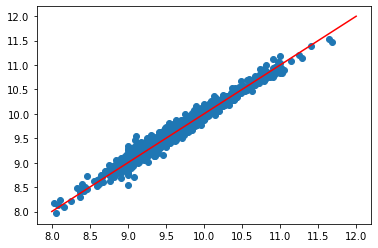

In [18]:
y_pred = nn.predict(X_test)
x = np.linspace(8, 12, 50)
plt.scatter(y_test, y_pred)
plt.plot(x,x, color='red')

***

## Fitting with 2nd Derivative

The same process was repeated again using only the second derivative to train the neural network.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(d2, y)

In [20]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf3 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf3)

/home/jpothoof/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


           0
0   0.019949
1   0.015431
2   0.012257
3   0.011904
4   0.010995
5   0.010964
6   0.010060
7   0.010549
8   0.009962
9   0.010590
10  0.010720
11  0.010051
12  0.009212
13  0.009992
14  0.009715
15  0.008599
16  0.008347
17  0.008891
18  0.009911
19  0.008970
20  0.010027
21  0.008508
22  0.008705
23  0.009130
24  0.008418
25  0.008886
26  0.008823
27  0.009006
28  0.008782
29  0.008334
30  0.008668
31  0.007857
32  0.008602
33  0.007624
34  0.008789
35  0.008301
36  0.007888
37  0.007198
38  0.007114
39  0.006982
40  0.008308
41  0.008537
42  0.008557
43  0.008886
44  0.007685
45  0.008957
46  0.007592
47  0.008890
48  0.008099
49  0.008075
50  0.006659
51  0.007538
52  0.007123
53  0.007672
54  0.008007
55  0.008415
56  0.007257
57  0.008370
58  0.007952
59  0.007501
60  0.007799
61  0.008226
62  0.008007
63  0.008280
64  0.006578
65  0.006857
66  0.007305
67  0.006981
68  0.007967
69  0.007232
70  0.007466
71  0.007400
72  0.006381
73  0.006833
74  0.007922
75  0.008089

In [21]:
min_loss3 = lossdf3.idxmin()[0]+1
print(min_loss3)
nn = MLPRegressor(hidden_layer_sizes=(min_loss3), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

83
0.005906514373904167


In [22]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score = nn.score(X_train, y_train)
test_score = nn.score(X_test, y_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print('training mse =  '+ str(train_mse))
print('testing mse = ' + str(test_mse))
print('training R2 = ' + str(train_score))
print('testing R2 = ' + str(test_score))

training mse =  0.009687345690006968
testing mse = 0.008630496932203541
training R2 = 0.9481987457541516
testing R2 = 0.9539393421006588


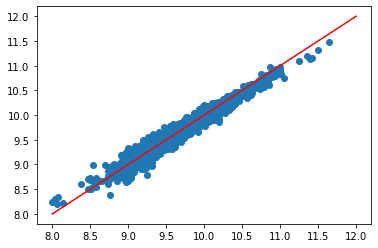

In [23]:
y_pred = nn.predict(X_test)
x = np.linspace(8, 12, 50)
plt.scatter(y_test, y_pred)
plt.plot(x,x, color='red')

In [24]:
loss = []
for i in range(100):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss3, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf4 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf4)

           0
0   0.007246
1   0.006861
2   0.004029
3   0.004020
4   0.003970
5   0.003841
6   0.004358
7   0.003056
8   0.003788
9   0.005785
10  0.005418
11  0.004562
12  0.002792
13  0.003646
14  0.004817
15  0.003234
16  0.003547
17  0.004692
18  0.003977
19  0.003607
20  0.004155
21  0.002764
22  0.004457
23  0.004998
24  0.003420
25  0.003047
26  0.003299
27  0.002615
28  0.004086
29  0.002618
30  0.005875
31  0.002790
32  0.002511
33  0.002872
34  0.002747
35  0.003505
36  0.002806
37  0.003235
38  0.002915
39  0.002015
40  0.003102
41  0.003758
42  0.003345
43  0.002948
44  0.003077
45  0.002855
46  0.002473
47  0.003608
48  0.004716
49  0.003048
50  0.002949
51  0.002849
52  0.002803
53  0.003333
54  0.003159
55  0.003099
56  0.002763
57  0.004352
58  0.003976
59  0.002728
60  0.002548
61  0.002848
62  0.003172
63  0.002821
64  0.002916
65  0.002856
66  0.003049
67  0.003548
68  0.002587
69  0.002339
70  0.003266
71  0.002511
72  0.002474
73  0.003081
74  0.002821
75  0.002449

In [25]:
min_loss4 = lossdf4.idxmin()[0]+1
print(min_loss4)
nn = MLPRegressor(hidden_layer_sizes=(min_loss3, min_loss4), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

40
0.0020146274592853157


In [26]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score = nn.score(X_train, y_train)
test_score = nn.score(X_test, y_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print('training mse =  '+ str(train_mse))
print('testing mse = ' + str(test_mse))
print('training R2 = ' + str(train_score))
print('testing R2 = ' + str(test_score))

training mse =  0.0031214498174559338
testing mse = 0.0029412364585795097
training R2 = 0.9833086357415232
testing R2 = 0.9843027247001047


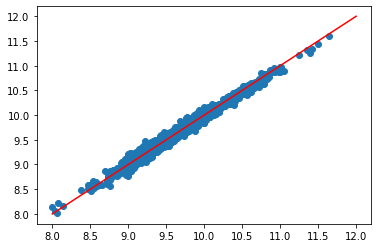

In [27]:
y_pred = nn.predict(X_test)
x = np.linspace(8, 12, 50)
plt.scatter(y_test, y_pred)
plt.plot(x,x, color='red')

***

## Fitting with 1st and 2nd Derivative:

Now we combine the 1st and 2nd derivative into a single dataset to train the neural network.

In [28]:
df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df3 = pd.concat([df1, df2], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df3, y)

Since the number of features has increased to 200 for the training data, we increase the layer size to match that.

In [29]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)
#     x = np.linspace(8, 12, 50)
#     plt.scatter(y_test, y_pred)
#     plt.plot(x,x, color='red')
lossdf5 = pd.DataFrame(loss)
print(lossdf5)

            0
0    0.011175
1    0.009516
2    0.008285
3    0.008112
4    0.007938
..        ...
194  0.005318
195  0.003856
196  0.003760
197  0.003633
198  0.004060

[199 rows x 1 columns]


In [30]:
min_loss5 = lossdf5.idxmin()[0]+1
print(min_loss5)
nn = MLPRegressor(hidden_layer_sizes=(min_loss5), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

190
0.0031262842569903747


In [31]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score = nn.score(X_train, y_train)
test_score = nn.score(X_test, y_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print('training mse =  '+ str(train_mse))
print('testing mse = ' + str(test_mse))
print('training R2 = ' + str(train_score))
print('testing R2 = ' + str(test_score))

training mse =  0.004660393075090652
testing mse = 0.004481997294183745
training R2 = 0.9753153150268483
testing R2 = 0.9753551942175579


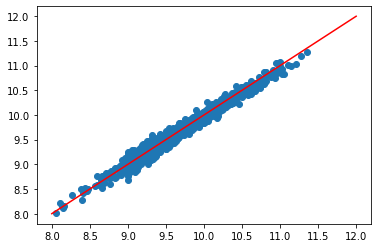

In [32]:
y_pred = nn.predict(X_test)
x = np.linspace(8, 12, 50)
plt.scatter(y_test, y_pred)
plt.plot(x,x, color='red')

In [33]:
loss = []
for i in range(200):
    if i == 0:
        pass
    else:
        nn = MLPRegressor(hidden_layer_sizes=(min_loss5, i), activation='identity', solver='adam', max_iter=500, random_state=28)
        nn = nn.fit(X_train, y_train)
        loss.append(nn.loss_)

lossdf6 = pd.DataFrame(loss)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lossdf6)

            0
0    0.003624
1    0.003079
2    0.003942
3    0.003691
4    0.003463
5    0.003175
6    0.003384
7    0.003997
8    0.003113
9    0.004355
10   0.002216
11   0.003203
12   0.002943
13   0.003980
14   0.002642
15   0.003915
16   0.003206
17   0.002229
18   0.001895
19   0.003985
20   0.002006
21   0.002072
22   0.002659
23   0.002864
24   0.003919
25   0.002218
26   0.002782
27   0.003012
28   0.003102
29   0.001989
30   0.002127
31   0.002515
32   0.002410
33   0.002991
34   0.002323
35   0.001959
36   0.002139
37   0.003125
38   0.002044
39   0.002164
40   0.002181
41   0.002536
42   0.002851
43   0.002814
44   0.002529
45   0.003333
46   0.002430
47   0.002239
48   0.002314
49   0.002357
50   0.002430
51   0.002924
52   0.002056
53   0.002956
54   0.002140
55   0.002302
56   0.002677
57   0.002424
58   0.001986
59   0.002031
60   0.002326
61   0.002435
62   0.003041
63   0.002553
64   0.002921
65   0.001899
66   0.001759
67   0.001507
68   0.002936
69   0.002175
70   0

As can be seen below, using both the 1st and 2nd derivative has resulted in the best loss, mean squared error, and R^2 values.

In [34]:
min_loss6 = lossdf6.idxmin()[0]+1
print(min_loss6)
nn = MLPRegressor(hidden_layer_sizes=(min_loss5, min_loss6), activation='identity', solver='adam', max_iter=500, random_state=28)
nn = nn.fit(X_train, y_train)
loss = nn.loss_
print(loss)

122
0.0014820705545183493


In [35]:
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)
train_score = nn.score(X_train, y_train)
test_score = nn.score(X_test, y_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print('training mse =  '+ str(train_mse))
print('testing mse = ' + str(test_mse))
print('training R2 = ' + str(train_score))
print('testing R2 = ' + str(test_score))

training mse =  0.002344730971324557
testing mse = 0.0022691987947168688
training R2 = 0.9875806730373676
testing R2 = 0.9875225351764222


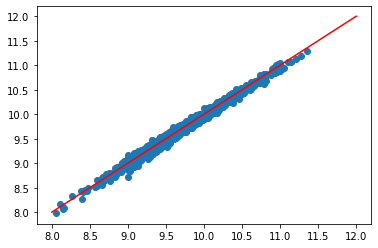

In [36]:
y_pred = nn.predict(X_test)
x = np.linspace(8, 12, 50)
plt.scatter(y_test, y_pred)
plt.plot(x,x, color='red')